In [1]:
import sys
sys.path.append('/Users/admin/Desktop/tesi/Thesis/')
from handcrafted_descriptors.grid_classification import utils
import import_ipynb
from handcrafted_descriptors.gabor_classification import utility as utility 
import cv2
from matplotlib import pyplot as plt
from skimage import feature
import numpy as np

importing Jupyter notebook from /Users/admin/Desktop/tesi/Thesis/handcrafted_descriptors/gabor_classification/utility.ipynb


In [2]:
species = ['Arthonia_radiata','Caloplaca_cerina','Candelariella_reflexa','Candelariella_xanthostigma','Chrysothrix_candelaris','Flavoparmelia_caperata','Gyalolechia_flavorubescens','Hyperphyscia_adglutinata'
        ,'Lecanora_argentata','Lecanora_chlarotera','Lecidella_elaeochroma','Melanelixia_glabratula'
        ,'Phaeophyscia_orbicularis','Physcia_biziana','Physconia_grisea','Ramalina_farinacea','Ramalina_fastigiata','Xanthomendoza_fallax','Xanthomendoza_fulva','flavoparmenia_soredians']


In [3]:
def calculate_max_value(numpoints):
    res = 1
    for i in range(1,numpoints):
        res = res + 2**(i)
    return res

In [4]:

class LocalBinaryPatterns:
    def __init__(self, numPoints, radius,meth = 'ror'):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
        self.meth = meth
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        if (self.meth == 'default'):
            
            lbp = feature.local_binary_pattern(image, self.numPoints,self.radius,method = 'default')
        else:
            lbp = feature.local_binary_pattern(image, self.numPoints,self.radius,method = 'ror')
        return lbp.ravel()
    

    


In [5]:
def lbp_extract_descriptors(path, numPoints, radius,meth = 'default',train = True):       
    desc = LocalBinaryPatterns(numPoints, radius, meth = meth)
    images_pth, label_dict = utility.getPath_and_dict(path, train)
    descriptor_list = [] 
    train_labels = []
    image_count = len(images_pth)  
    for i,img_path in enumerate(images_pth):
        cl = img_path.split('/')[-2]
        class_index = cl
        train_labels.append(class_index)        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        hist1 = desc.describe(img[:,:,0])
        hist2 = desc.describe(img[:,:,1])
        hist3 = desc.describe(img[:,:,2])
        lbp_total = np.concatenate([hist1,hist2,hist3])
        if meth == 'uniform':
            maximum = calculate_max_value(numPoints)
            (hist, _) = np.histogram(lbp_total.ravel(),bins=np.arange(0, maximum + 3),
                        range=(0, maximum + 2))
        else: 
            maximum = calculate_max_value(numPoints)
            (hist, _) = np.histogram(lbp_total.ravel(),bins=np.arange(0, maximum + 3),
                        range=(0, maximum + 2))
        hist = hist / np.sum(hist)
        descriptor_list.append(hist)     
    descriptors =np.array(descriptor_list)
    train_labels = np.array(train_labels)
    return descriptors, train_labels
    
    

## MAIN

start calculating descriptor
end calculating descriptor
start svm
Best estimator found by grid search :  SVC(C=1000.0, degree=2, gamma=1, kernel='poly')
Accuracy score : 0.2916666666666667
end svm
start calculating descriptor
end calculating descriptor
start svm
Best estimator found by grid search :  SVC(C=1000.0, degree=2, gamma=1, kernel='poly')
Accuracy score : 0.3048245614035088
end svm
start calculating descriptor
end calculating descriptor
start svm
Best estimator found by grid search :  SVC(C=1000.0, degree=2, gamma=1, kernel='poly')
Accuracy score : 0.22149122807017543
end svm
start calculating descriptor
end calculating descriptor
start svm
Best estimator found by grid search :  SVC(C=1000.0, degree=2, gamma=1, kernel='poly')
Accuracy score : 0.21271929824561403
end svm
start calculating descriptor
end calculating descriptor
start svm
Best estimator found by grid search :  SVC(C=1000.0, degree=2, gamma=1, kernel='poly')
Accuracy score : 0.19736842105263158
end svm
start calcul

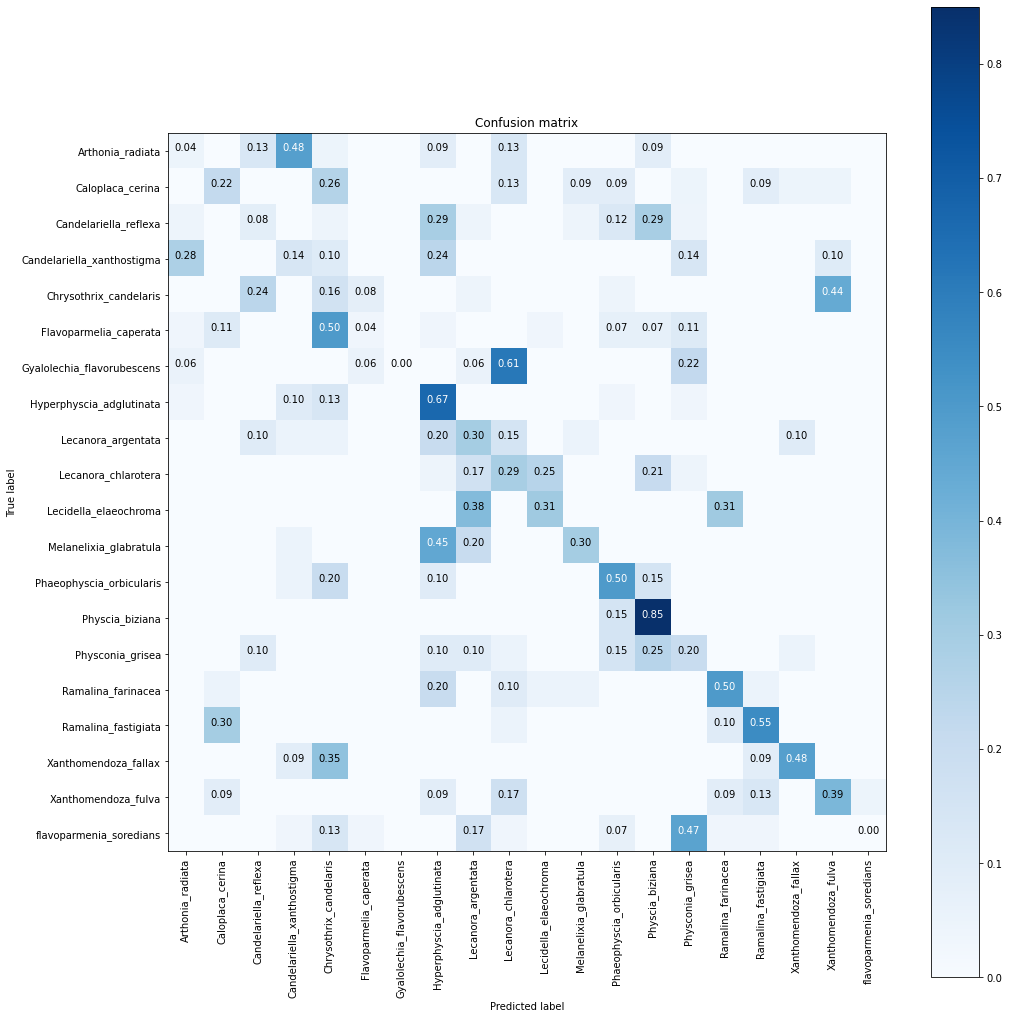

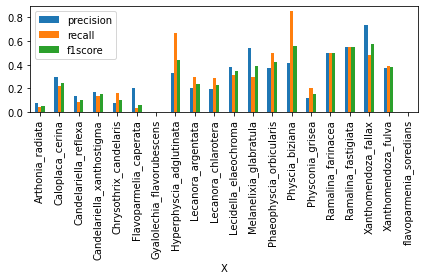

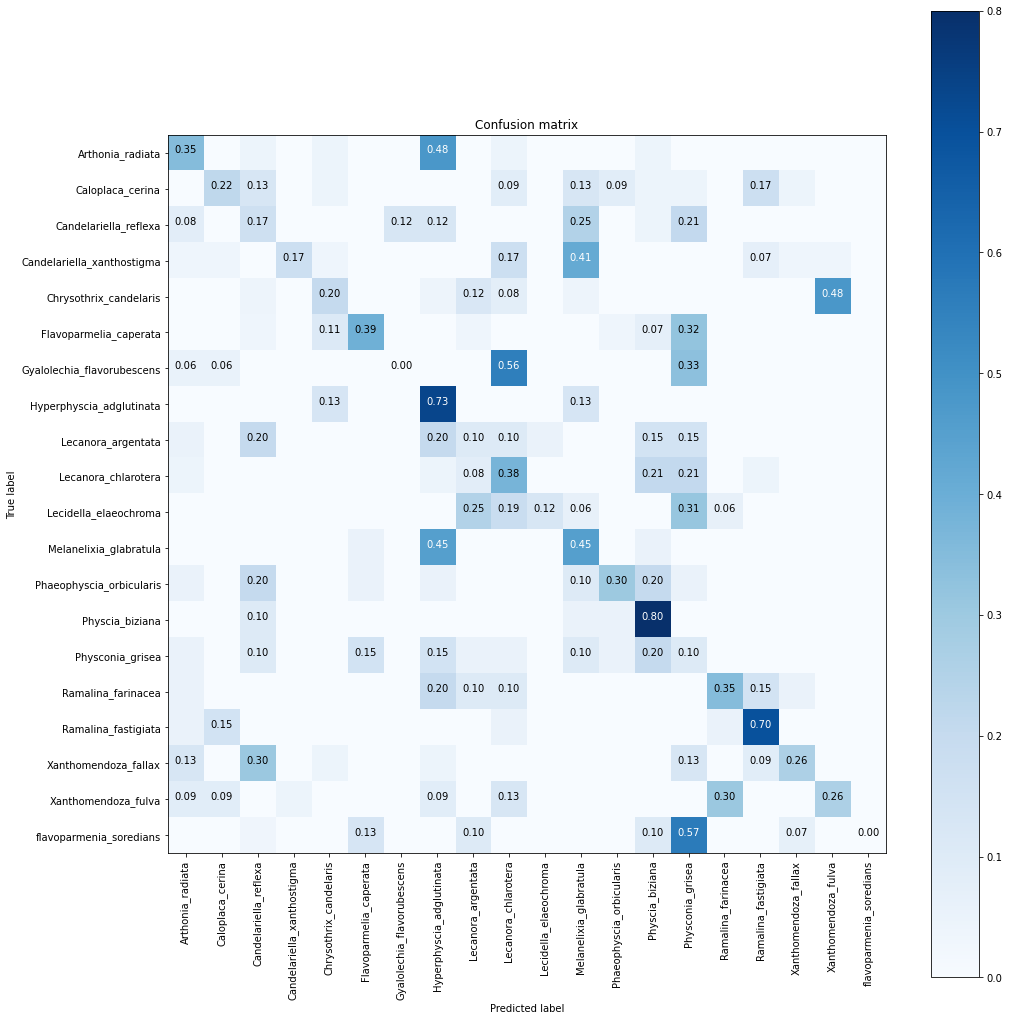

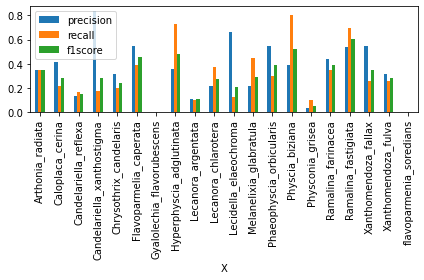

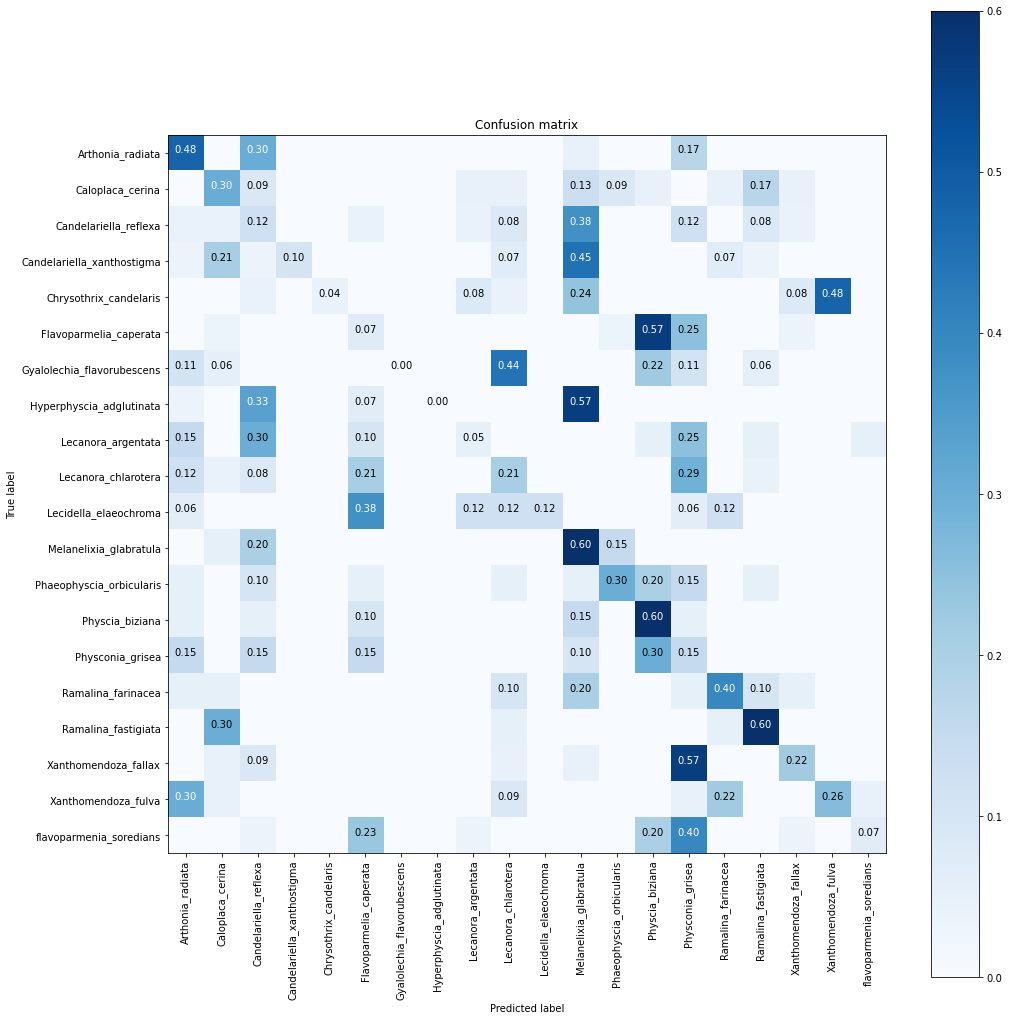

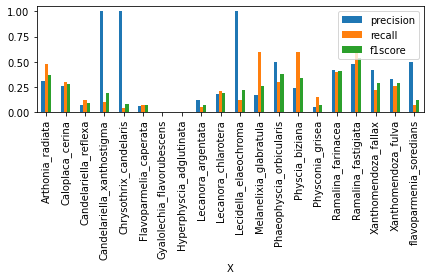

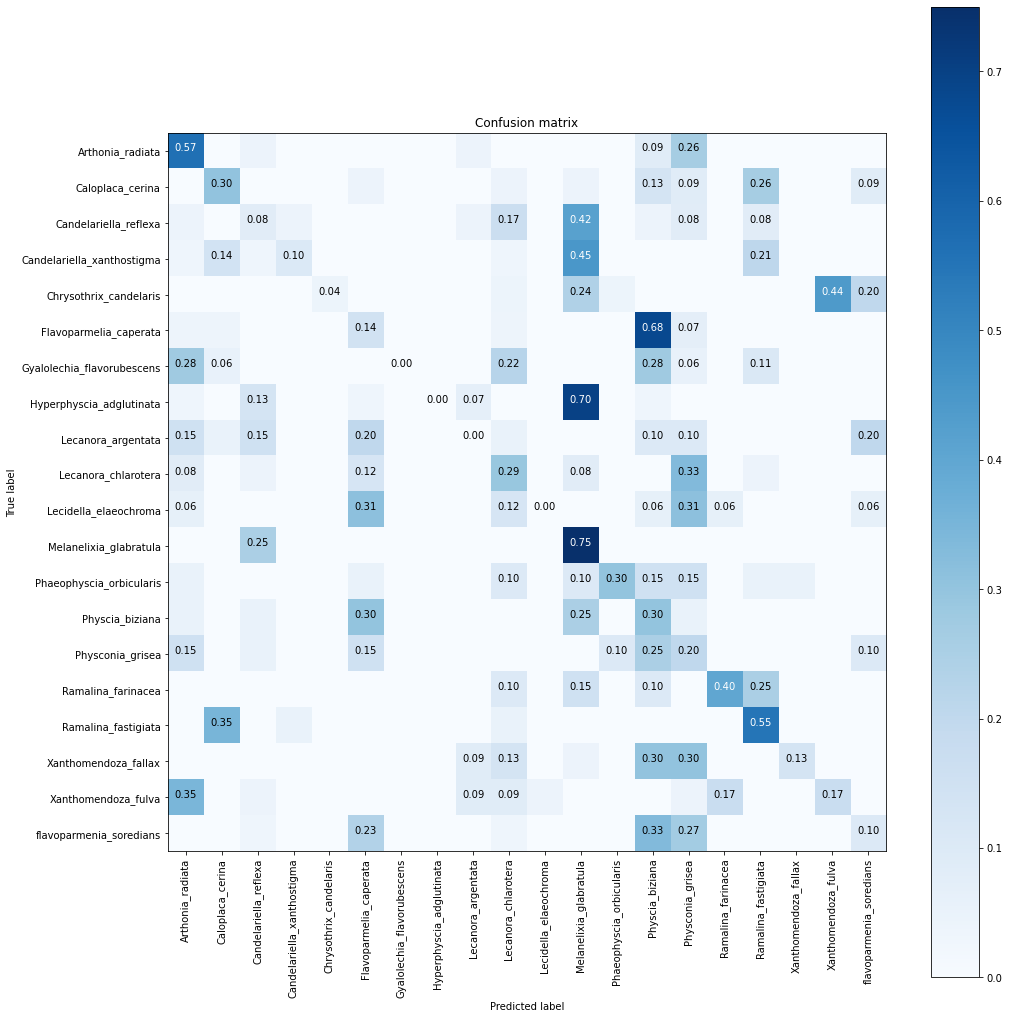

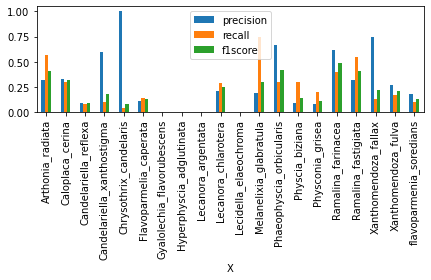

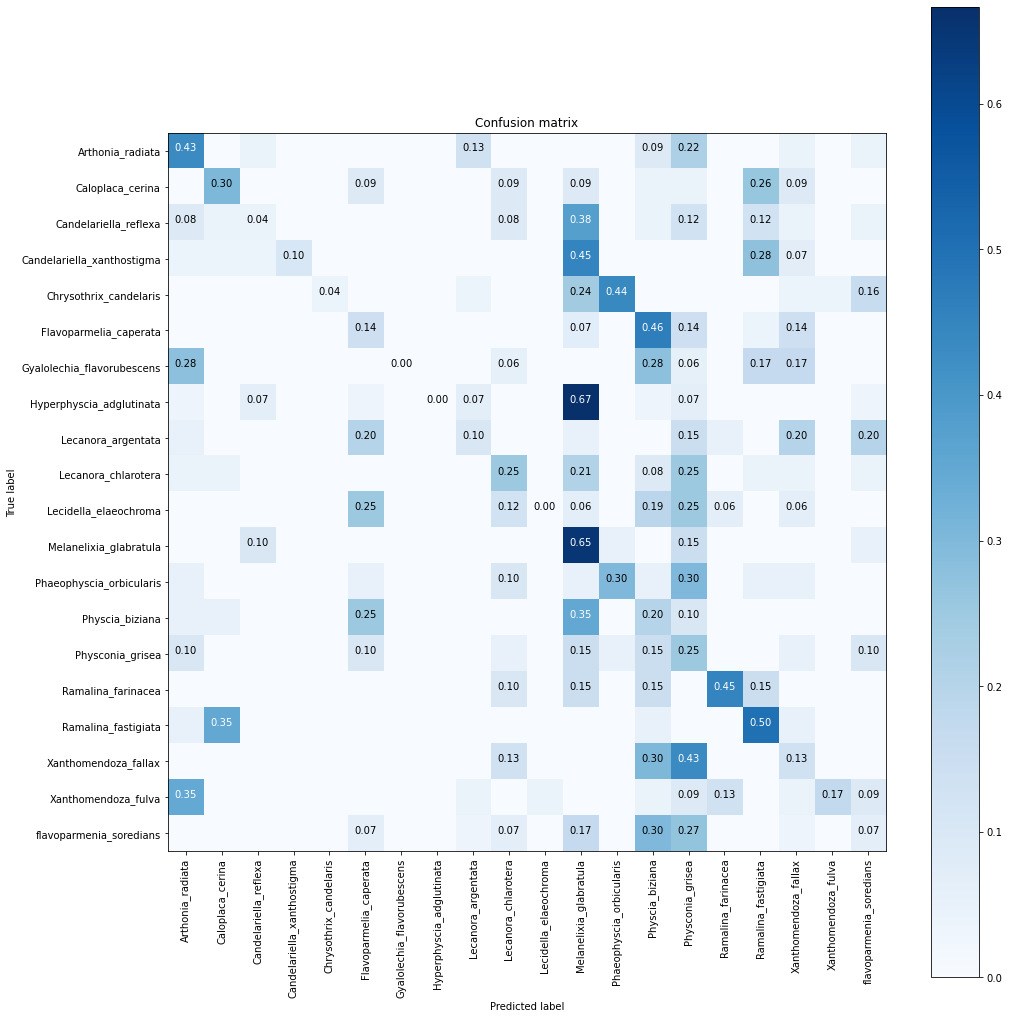

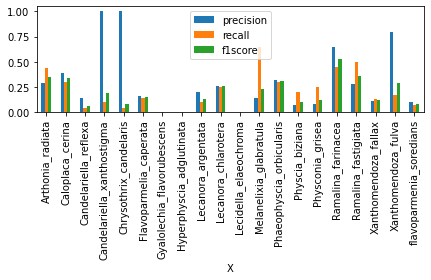

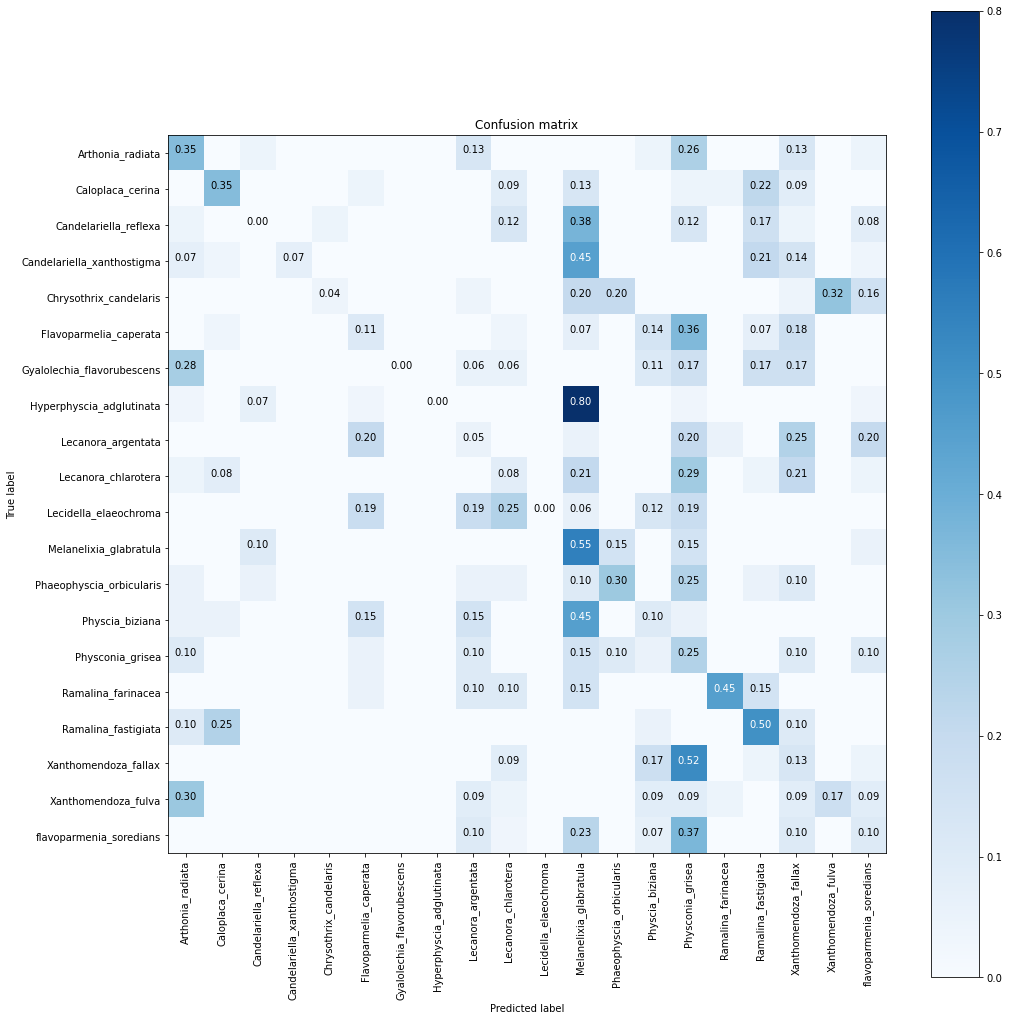

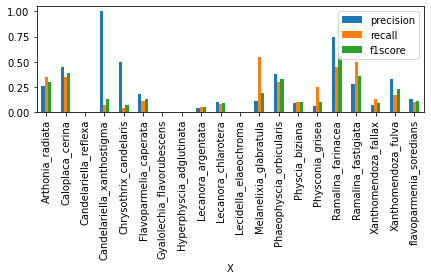

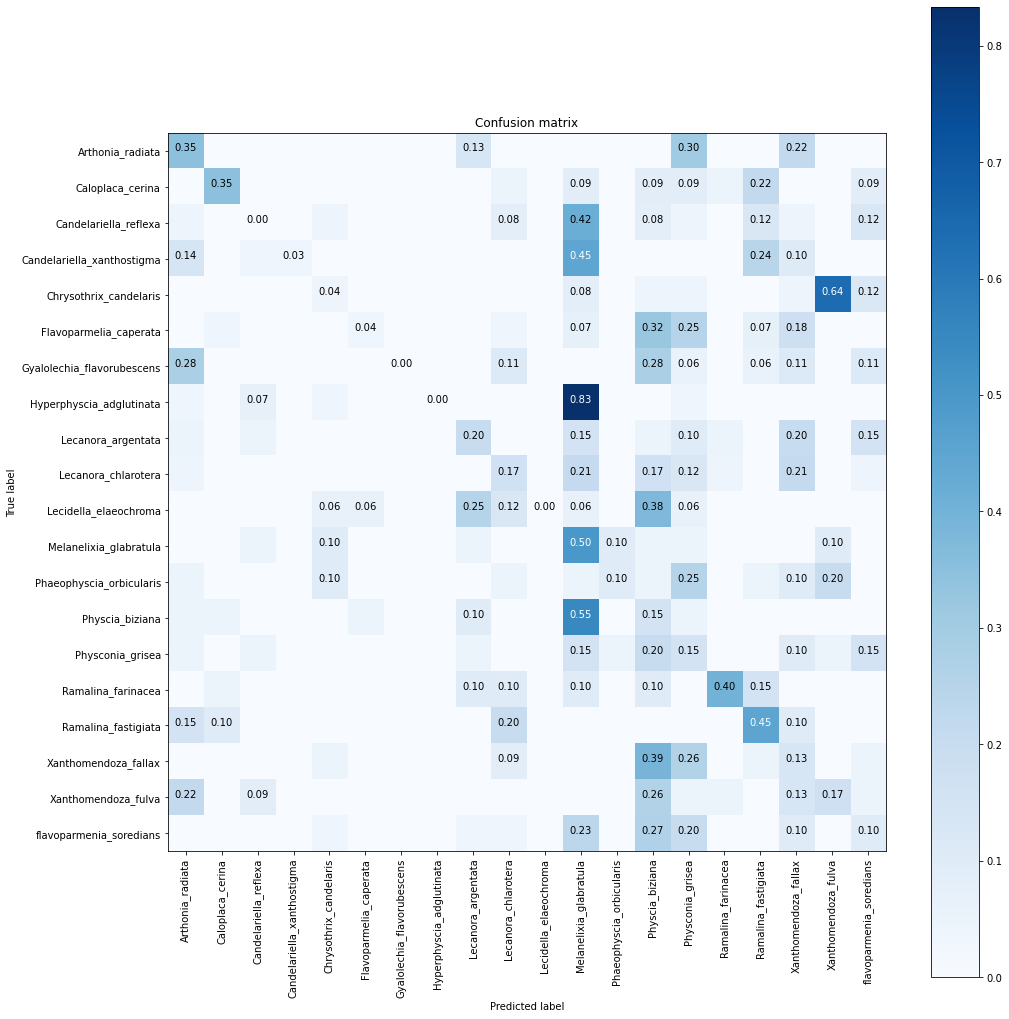

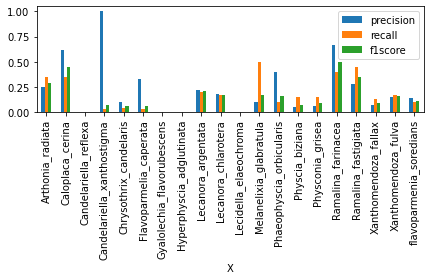

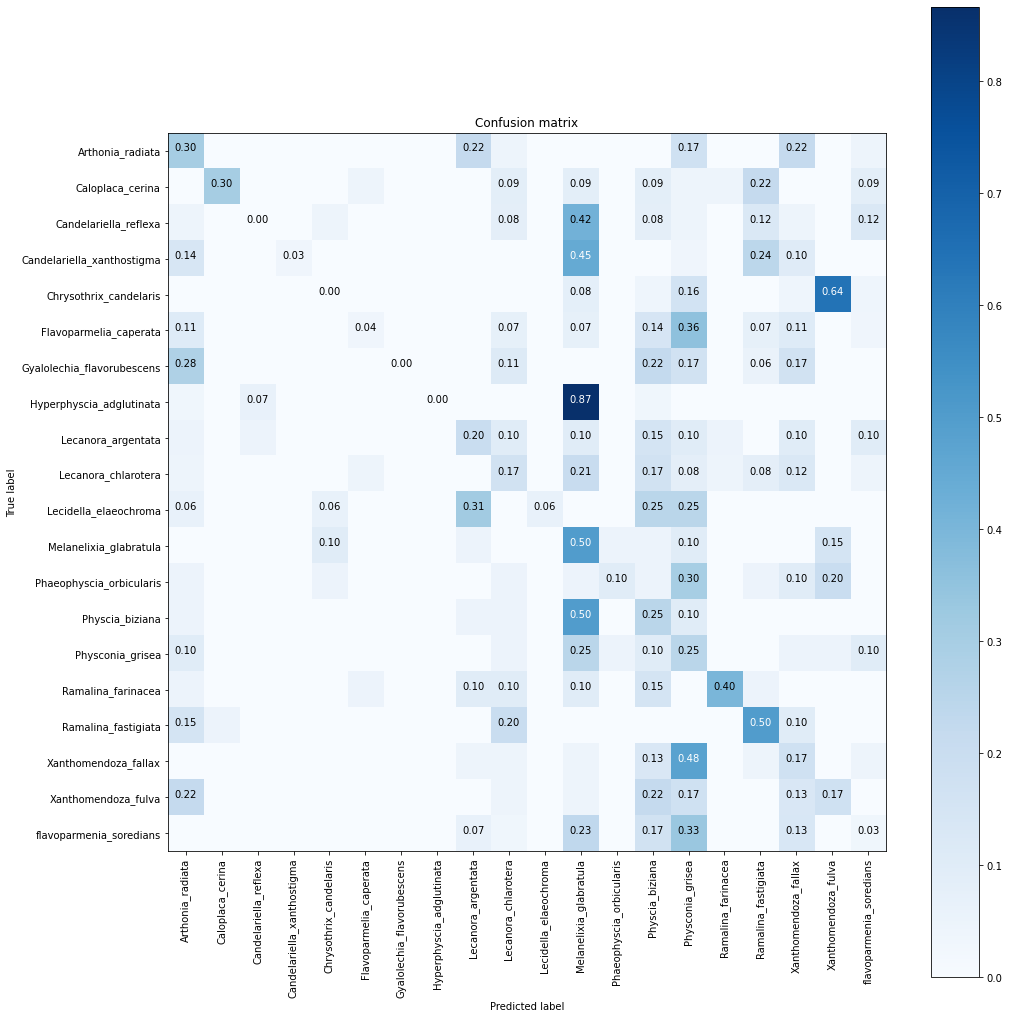

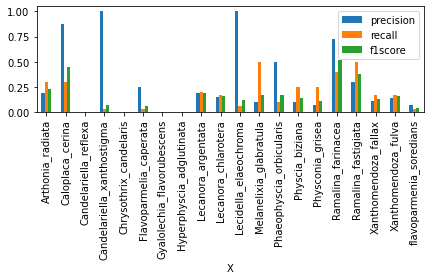

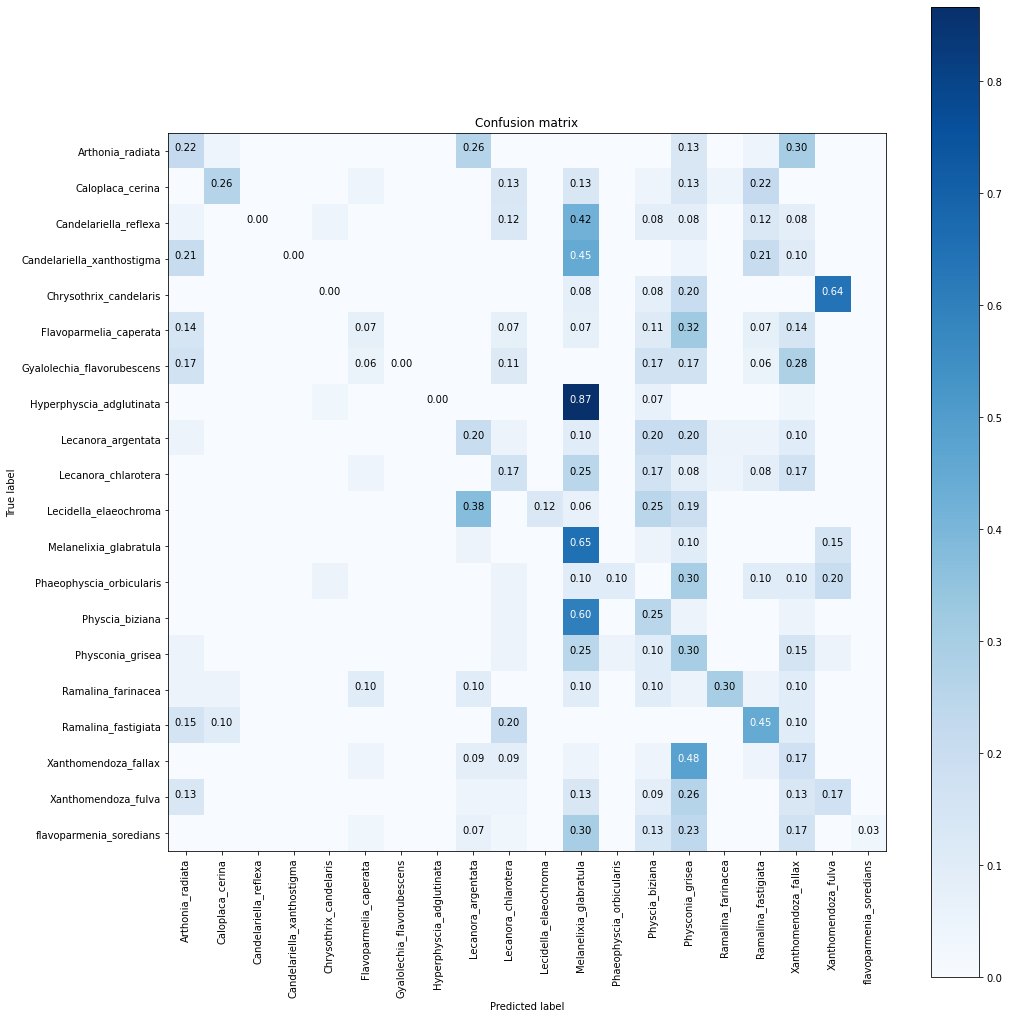

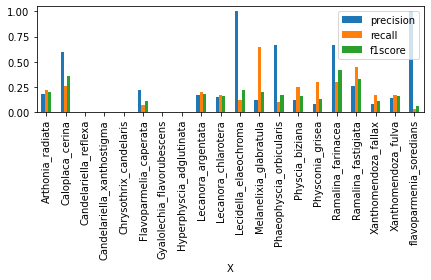

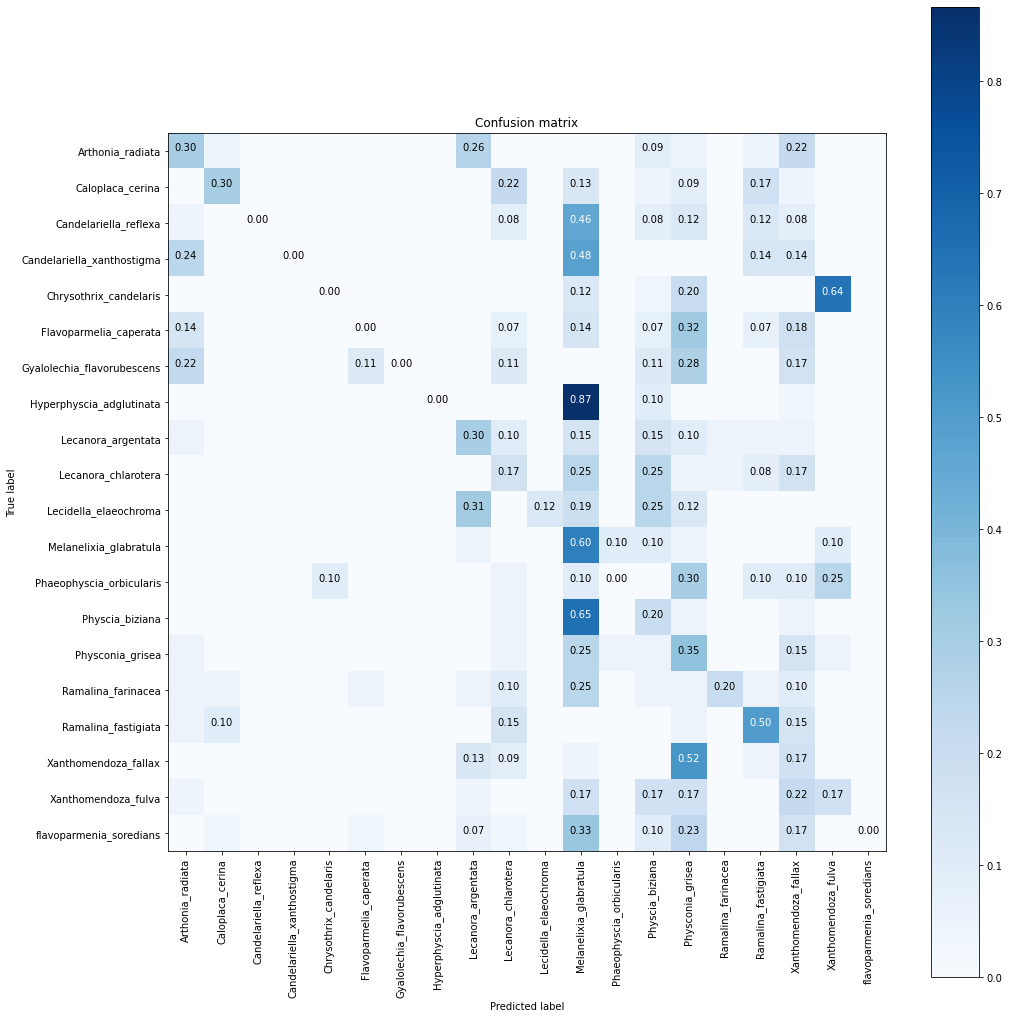

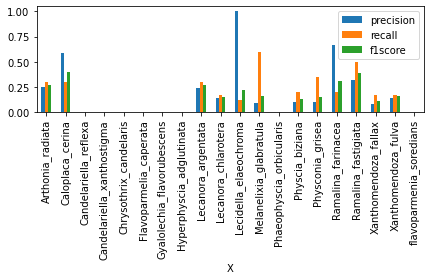

In [11]:
import pandas as pd
accuracy = []
precision = []
recall = []
for radius in [1,2,3,4,5,6,7,8,9,10]:
    print('start calculating descriptor')
    feat,lab = lbp_extract_descriptors('../../../data/train', 8, radius,meth = 'ror',train = True)    
    test_feat, test_lab = lbp_extract_descriptors('../../../data/valid',8, radius,meth = 'ror',train = False)
    print('end calculating descriptor')
    print('start svm')
    svm, acc =utility.search_for_best_poly(feat, lab, test_feat, test_lab)
    print('end svm')
    director_cm = 'results/results_lbp/'
    name_cm = 'cm_'+ str(radius)
    pred = utility.create_and_save_confusion_matrix(svm, test_feat, test_lab, species, director_cm, name_cm)
    
    director_pra = 'results/results_lbp/'
    name_pra = 'pra_' + str(radius)
    prec, rec, fbeta = utility.calculate_and_plot_precision_recall(test_lab, pred, species, director_pra, name_pra)
    precision.append(prec)
    recall.append(rec)
    accuracy.append(acc)

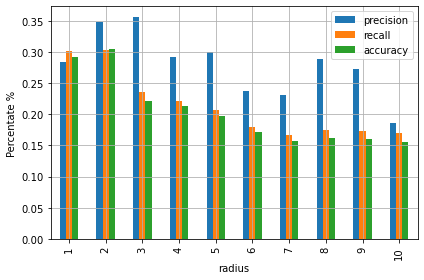

In [12]:
x1 = [1,2,3,4,5,6,7,8,9,10]
df = pd.DataFrame({"X":x1, "precision":precision,"recall":recall,'accuracy': accuracy})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('radius')
plt.ylabel('Percentate %')
plt.tight_layout()
plt.savefig('results/results_lbp/total8points_bar.jpg')

## MULTI-SCALE APPROACH

In [ ]:
def multiscale_lbp_extract_descriptors(path, numPoints ,meth = 'default',train = True):       
    desc = [LocalBinaryPatterns(numPoints, 1, meth = meth), LocalBinaryPatterns(numPoints, 2, meth = meth),LocalBinaryPatterns(numPoints, 3, meth = meth),LocalBinaryPatterns(numPoints, 4, meth = meth),LocalBinaryPatterns(numPoints, 5, meth = meth)]
    images_pth, label_dict = utility.getPath_and_dict(path, train)
    descriptor_list = [] 
    train_labels = []
    image_count = len(images_pth)  
    for i,img_path in enumerate(images_pth):
        cl = img_path.split('/')[-2]
        class_index = cl
        train_labels.append(class_index)
        hist = []
        for dsc in desc:         
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            hist1 = dsc.describe(img[:,:,0])
            hist2 = dsc.describe(img[:,:,1])
            hist3 = dsc.describe(img[:,:,2])
            lbp_total = np.concatenate([hist1,hist2,hist3])
            maximum = calculate_max_value(numPoints)
            (hist_tmp, _) = np.histogram(lbp_total.ravel(),bins=np.arange(0, maximum + 3),range=(0, maximum + 2))
            hist.append(hist_tmp)
 
        hist = np.array(hist)
        hist = hist.reshape(-1)
        hist = hist / np.sum(hist)
        descriptor_list.append(hist)     
    descriptors =np.array(descriptor_list)
    train_labels = np.array(train_labels)
    return descriptors, train_labels
    

In [ ]:
feat,lab = multiscale_lbp_extract_descriptors('../../../data/train', 8,train = True)    
test_feat, test_lab = multiscale_lbp_extract_descriptors('../../../data/valid',8,train = False)

In [ ]:
acc,prec, rec, classif = utility.train_model_and_calculate_accuracy(feat, lab, test_feat, test_lab)
x1 = np.arange(1,51)
plt.plot(x1, acc, label = "accuracy",color = 'r')
plt.plot(x1,prec, label = 'precision')
plt.plot(x1, rec, label = 'recall',color = 'g')
plt.xlabel('number of neighbors')
plt.ylabel('percentage (%)')
plt.legend()
plt.grid()
plt.savefig('k-nearest_neighbor_total.jpg')